## The Set Up

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
from IPython.display import clear_output

In [3]:
# Import data from the historical_prices table

conn = sql.connect("crypto_data.db")
data = pd.read_sql("SELECT * FROM historical_prices_raw;", conn)
conn.close()

### Data Definitions

#### Columns
* open:
* high: 
* low: 
* close:
* volume:
* market_cap:

#### Key Definitions
* volume:
* market cap:

## Data Import and Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921646 entries, 0 to 921645
Data columns (total 8 columns):
date          921646 non-null object
open          921646 non-null float64
high          921646 non-null float64
low           921646 non-null float64
close         921646 non-null float64
volume        912003 non-null float64
market_cap    805600 non-null float64
coin          921646 non-null object
dtypes: float64(6), object(2)
memory usage: 56.3+ MB


In [5]:
data.describe()

,open,high,low,close,volume,market_cap
count,9.216460e+05,9.216460e+05,9.216460e+05,9.216460e+05,9.120030e+05,8.056000e+05
mean,4.843170e+06,4.073056e+06,5.523597e+06,4.811669e+06,8.975229e+06,2.008290e+08
std,1.349760e+08,1.239238e+08,1.463405e+08,1.352841e+08,1.872920e+08,3.868012e+09
min,1.000000e-06,1.000000e-06,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00
25%,2.589000e-03,2.912250e-03,2.304000e-03,2.580000e-03,1.900000e+02,1.028598e+05
50%,2.564300e-02,2.855100e-02,2.305250e-02,2.553800e-02,4.460000e+03,9.928725e+05
75%,2.517935e-01,2.769723e-01,2.287900e-01,2.507888e-01,1.218730e+05,9.211763e+06
max,9.900000e+09,9.900000e+09,2.500000e+10,2.000000e+10,2.384090e+10,3.265025e+11


In [6]:
all_coins = data['coin'].unique().tolist()

#Number of coins in dataset
print(len(all_coins))

2016


Because of the nature of this analysis, I'm going to remove the entries for coins with the following properties:
* Coins missing market caps for each day
* Coins missing market cap on the most recent day (this is needed for future market cap estimations)
* Coins with untrustworthy data

In [7]:
# Remove coins missing all market cap information
df = data.fillna({
    'market_cap' : 0
}).groupby('coin', as_index = False).agg({
    'market_cap' : 'max'
})

coins_with_no_market_cap = df[df['market_cap'] == 0]['coin'].tolist()

data = data[~data['coin'].isin(coins_with_no_market_cap)]

In [8]:
# Remove coins missing market cap on most recent day
today = max(data['date'])
coins_missing_todays_market_cap = data[(data['market_cap'].isnull()) & (data['date'] == today)]['coin'].tolist()
data = data[~data['coin'].isin(coins_missing_todays_market_cap)]

In [9]:
# Remove coins with untrustworthy data

data[data['open'] > 20000]

,date,open,high,low,close,volume,market_cap,coin
67528,2017-04-02 00:00:00,75000000.0,7.600000e+07,73000000.0,7.500000e+07,0.0,NaN,grandcoin
67529,2017-04-01 00:00:00,75000000.0,7.700000e+07,74000000.0,7.600000e+07,0.0,NaN,grandcoin
78153,2015-11-20 00:00:00,99000000.0,1.000000e-06,95000000.0,1.000000e-06,3368.0,296349.0,fedoracoin
78160,2015-11-13 00:00:00,96000000.0,1.000000e-06,95000000.0,1.000000e-06,1388.0,282784.0,fedoracoin
78162,2015-11-11 00:00:00,94000000.0,1.000000e-06,93000000.0,1.000000e-06,1554.0,286604.0,fedoracoin
78172,2015-11-01 00:00:00,98000000.0,1.000000e-06,98000000.0,1.000000e-06,1042.0,300506.0,fedoracoin
78174,2015-10-30 00:00:00,83000000.0,1.000000e-06,83000000.0,1.000000e-06,2556.0,291940.0,fedoracoin
78175,2015-10-29 00:00:00,79000000.0,8.400000e+07,79000000.0,8.300000e+07,1427.0,233664.0,fedoracoin
78176,2015-10-28 00:00:00,76000000.0,8.000000e+07,72000000.0,7.900000e+07,1504.0,222009.0,fedoracoin
78177,2015-10-27 00:00:00,77000000.0,8.200000e+07,74000000.0,7.600000e+07,1405.0,212910.0,fedoracoin


There seems to be a lot of rows where the open price is above $20K. One option is to go through each one and manually enter the correct price. Instead, I'll just get rid of any data for any coins with a price larger than the highest price of btc (the highest valued coin in the crypto markets).

In [10]:
max_btc_price = max(data[data['coin'] == 'bitcoin']['high'])
coins_with_large_prices = data[data['open'] > max_btc_price]['coin'].unique().tolist()
data = data[~data['coin'].isin(coins_with_large_prices)]

In [11]:
max_btc_price

20089.0

Wow BTC hit over $20K!

Ok, now let's see how the data looks with the previous changes.

In [12]:
data.describe()

,open,high,low,close,volume,market_cap
count,810710.000000,810710.000000,8.107100e+05,810710.000000,8.024530e+05,7.644290e+05
mean,15.516357,16.418941,1.134594e+03,15.497084,1.011610e+07,2.114884e+08
std,250.034624,262.858355,3.106119e+05,249.780449,1.996216e+08,3.970527e+09
min,0.000001,0.000001,1.000000e-06,0.000001,0.000000e+00,0.000000e+00
25%,0.003375,0.003819,2.978000e-03,0.003367,2.210000e+02,1.162720e+05
50%,0.029037,0.032460,2.600800e-02,0.028925,5.312000e+03,1.113656e+06
75%,0.252969,0.279824,2.284515e-01,0.251941,1.401610e+05,1.000594e+07
max,19475.800000,20089.000000,9.900000e+07,19497.400000,2.384090e+10,3.265025e+11


The distribution of values in the open, high, low, and close columns look more reasonable now. Volume isn't 100% necessary in this analysis, but market cap is. It might be possible to enter in some estimates for any missing values in this column. 

In [13]:
all_coins = data['coin'].unique().tolist()
coins_with_missing_market_cap = data[data['market_cap'].isnull()]['coin'].unique().tolist()

# Percentage of coins with missing market cap
print("Percentage of coins with missing market cap: ", round(len(coins_with_missing_market_cap) / len(all_coins), 2))

Percentage of coins with missing market cap:  0.76


My assumption is that the price of the coin (open, high, low, close) has a strong correlation with market cap. For example, here are some scatter plots of bitcoins price columns against its market cap over time. 

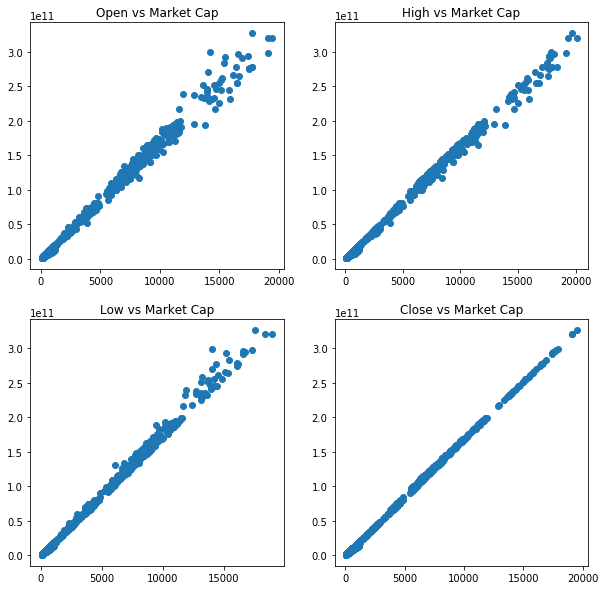

In [14]:
fig = plt.figure(figsize = (10, 10))

bitcoin = data[data['coin'] == 'bitcoin']

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(bitcoin['open'], bitcoin['market_cap'])
ax1.set_title("Open vs Market Cap")
ax2.scatter(bitcoin['high'], bitcoin['market_cap'])
ax2.set_title("High vs Market Cap")
ax3.scatter(bitcoin['low'], bitcoin['market_cap'])
ax3.set_title("Low vs Market Cap")
ax4.scatter(bitcoin['close'], bitcoin['market_cap'])
ax4.set_title("Close vs Market Cap")

plt.show()

Bitcoin's close price looks more correlated with its market cap than any other of its price columns. Let's look at this correlation for all coins in the dataset

In [15]:
open_corrs = []
high_corrs = []
low_corrs = []
close_corrs = []

for coin in all_coins:
    subset = data[data['coin'] == coin].dropna(subset = ['market_cap'])
    open_corrs.append(subset['open'].corr(subset['market_cap']))
    high_corrs.append(subset['high'].corr(subset['market_cap']))
    low_corrs.append(subset['low'].corr(subset['market_cap']))
    close_corrs.append(subset['close'].corr(subset['market_cap']))
    
print("Average Correlation - Open vs Market Cap: {}".format(np.nanmean(np.array(open_corrs))))
print("Average Correlation - High vs Market Cap: {}".format(np.nanmean(np.array(high_corrs))))
print("Average Correlation - Low vs Market Cap: {}".format(np.nanmean(np.array(low_corrs))))
print("Average Correlation - Close vs Market Cap: {}".format(np.nanmean(np.array(close_corrs))))

Average Correlation - Open vs Market Cap: 0.8695756248409982
Average Correlation - High vs Market Cap: 0.8822129768274686
Average Correlation - Low vs Market Cap: 0.8931051955704264
Average Correlation - Close vs Market Cap: 0.9403326437391869


I'll use any change in the closing price price to estimate any missing market cap values 

In [16]:
while len(data[data['market_cap'].isnull()]) != 0:
    prices = data[['coin', 'date', 'close', 'market_cap']].copy()
    prices['shifted_close'] = prices.groupby(['coin'])['close'].shift(-1)
    prices['close_change'] = (prices['shifted_close'] - prices['close']) / prices['shifted_close']
    prices['market_cap_est'] = prices['market_cap'] + (prices['market_cap'] * prices['close_change'])
    prices['market_cap_est'] = prices.groupby(['coin'])['market_cap_est'].shift(1)

    data = data.merge(prices[['coin', 'date', 'market_cap_est']], 'left', on = ['coin', 'date'])
    data['market_cap'] = data['market_cap'].combine_first(data['market_cap_est'])
    del data['market_cap_est']
    clear_output()
    print("{}% complete".format(round((len(data[data['market_cap'].notnull()]) / len(data)) * 100, 2)))

100.0% complete


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810710 entries, 0 to 810709
Data columns (total 8 columns):
date          810710 non-null object
open          810710 non-null float64
high          810710 non-null float64
low           810710 non-null float64
close         810710 non-null float64
volume        802453 non-null float64
market_cap    810710 non-null float64
coin          810710 non-null object
dtypes: float64(6), object(2)
memory usage: 55.7+ MB


Alright! The data is finally at a place where we can do some further analysis. Next, I'll save it to a new table 'historical_prices_clean' so that we don't have to go through this cleaning process each time the data is used. 

In [18]:
conn = sql.connect('crypto_data.db')
data.to_sql('historical_prices_clean', conn, if_exists = 'replace', index = False)
conn.close()